# Avaliação	de	Aprendizagem	de	Máquina	em	Data	Science/Data	Analytics

Luan Prates 07 setembro de 2018

## Questão	8
Carregue os dados contidos no Dataset de Iris do scikit-learn. - Divida o conjunto de dados entre treino e teste.  - Utilize o Classificador baseado em Redes Neurais (MLPClassifier) para realizar a classificação dos dados carregados. - Varie o parâmetro hidden_layer_sizes de 10 a 100 (de 10 em 10) e mostre um gráfico contendo a diferença entre os scores obtidos no conjunto de treino para cada valor do parâmetro. - Varie o parâmetro hidden_layer_sizes de 10 a 100 (de 10 em 10) e mostre um gráfico contendo a diferença entre os scores obtidos no conjunto de teste para cada valor do parâmetro. Justifique as diferenças apresentadas em nos gráficos do treino e do teste para cada valor de hidden_layer_sizes. Altere o parâmetro learning_rate para ‘adaptive’ e repita os experimentos realizados mostrando os mesmos gráficos. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-paper')
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neural_network import MLPClassifier

In [2]:
iris = datasets.load_iris()
X = iris.data
X_scale = scale(X)
y = iris.target
class_names = iris.target_names

In [3]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_scale, y, 
                                                        test_size = 0.20, 
                                                        random_state = 57)

In [4]:
t_camadas = np.arange(10, 101, 10)
t_camadas

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [5]:
treino = []
teste = []
for n in t_camadas:
    model = MLPClassifier(hidden_layer_sizes=n, random_state=57)
    model.fit(X_treino, y_treino)
    treino.append(model.score(X_treino, y_treino))
    teste.append(model.score(X_teste, y_teste))

C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


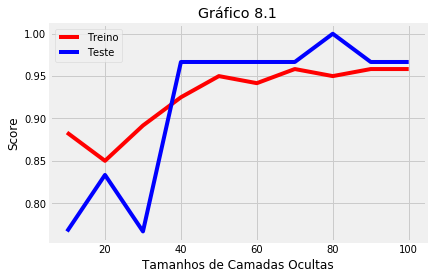

In [6]:
plt.plot(t_camadas, treino, c='r', label='Treino')
plt.plot(t_camadas, teste, c='b', label='Teste')
plt.title('Gráfico 8.1')
plt.ylabel('Score')
plt.xlabel('Tamanhos de Camadas Ocultas')
plt.legend()
plt.savefig('imagens/Questão-8.png', transparent = True)
plt.show()

In [7]:
treino = []
teste = []
for n in t_camadas:
    model = MLPClassifier(hidden_layer_sizes=n, learning_rate='adaptive', random_state=57)
    model.fit(X_treino, y_treino)
    treino.append(model.score(X_treino, y_treino))
    teste.append(model.score(X_teste, y_teste))

C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


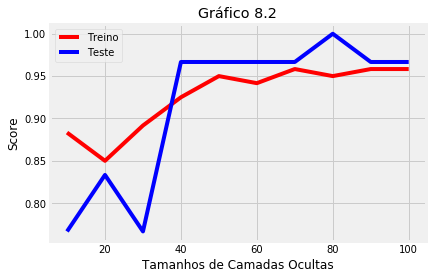

In [8]:
plt.plot(t_camadas, treino, c='r', label='Treino')
plt.plot(t_camadas, teste, c='b', label='Teste')
plt.title('Gráfico 8.2')
plt.ylabel('Score')
plt.xlabel('Tamanhos de Camadas Ocultas')
plt.legend()
plt.savefig('imagens/Questão-82.png', transparent = True)
plt.show()